# Process of Benchmarking data

In [1]:
from functions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

In [17]:
# target_qubits = [41,42]
target_qubits = [0]
n_qubits = len(target_qubits)

# epsilon = 0.01
# machine_title = '2q-qvm'
machine_title = 'Aspen-M-3'
# noise_model = 'depolarising_noise'
noisy_machine = machine_title

# noisy_machine = 'depolarising_noise' + '_epsilon{}'.format(epsilon)
# noise_model = 'z_noise'
path = os.path.join( os.getcwd(), 'output_storage', noisy_machine)

In [18]:
avg_fdlty_dict = {}
err_fdlty_dict = {}
ordered_layers_dict = {}

In [19]:
def capture_bench_dataframe(path):
    dataframe = pd.read_csv(os.path.join(path, '{}.csv'.format(machine_title) ) )
    dataframe = dataframe[dataframe['target qubits'] == str(target_qubits)]
    return dataframe

def filter_large_errors(dataframe):
    return dataframe[dataframe['error of fidelity'] <= 0.05]

def capture_bench_arrays(dataframe, version_name):
    dataframe = dataframe[ dataframe['protocol name'] == version_name ]
    ordered_layers = dataframe['circuit depth']
    avg_fdlty_arr = dataframe['average of fidelity']
    err_fdlty_arr = dataframe['error of fidelity']
    return ordered_layers, avg_fdlty_arr, err_fdlty_arr

In [20]:
df = capture_bench_dataframe(path)

In [21]:
df = filter_large_errors(df)

In [22]:
bench_versions = df['protocol name'].unique()
for version in bench_versions:
    avg_fdlty_dict[version] = []
    err_fdlty_dict[version] = []
    ordered_layers_dict[version] = []

    try:
        ordered_layers, avg_fdlty_arr, err_fdlty_arr = capture_bench_arrays(df, version)
        avg_fdlty_dict[version] = avg_fdlty_arr
        err_fdlty_dict[version] = err_fdlty_arr
        ordered_layers_dict[version] = ordered_layers
    except:
        pass

In [23]:
df

,date,target qubits,number of sequences,number of shots,protocol name,circuit depth,average of fidelity,error of fidelity
8,2023-01-26,[0],50,200,native_conditional_single_qubit,10,0.8788,0.027469
9,2023-01-26,[0],50,200,native_conditional_single_qubit,15,0.8936,0.028531
10,2023-01-26,[0],50,200,native_conditional_single_qubit,20,0.8366,0.033859
11,2023-01-17,[0],50,50,native_conditional_single_qubit,10,0.9044,0.035842
17,2023-01-15,[0],50,50,native_conditional_single_qubit,0,0.9432,0.033072
18,2023-01-15,[0],50,50,native_conditional_single_qubit,1,0.9352,0.036783
19,2023-01-15,[0],50,50,native_conditional_single_qubit,2,0.9344,0.035336
20,2023-01-15,[0],50,50,native_conditional_single_qubit,3,0.9248,0.035679
21,2023-01-15,[0],50,50,native_conditional_single_qubit,4,0.9240,0.042521


In [24]:
err_fdlty_dict

{'native_conditional_single_qubit': 8     0.027469
 9     0.028531
 10    0.033859
 11    0.035842
 17    0.033072
 18    0.036783
 19    0.035336
 20    0.035679
 21    0.042521
 Name: error of fidelity, dtype: float64}

In [26]:
bench_versions

array(['native_conditional_single_qubit'], dtype=object)

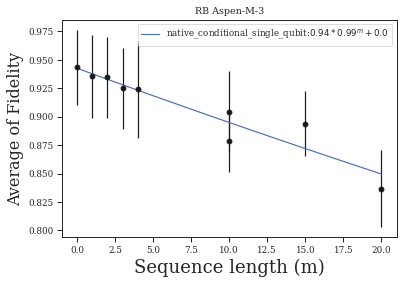

In [28]:
fig = plt.figure()
ax = fig.add_subplot()


# for version in ['native_conditional_conditional_two_qubits']:
for version in ['native_conditional_single_qubit']:
#     plot_bench_arrays(ax, version, epsilon)
    plot_decay(ordered_layers_dict[version][:], avg_fdlty_dict[version][:],
               err_fdlty_dict[version][:], label = version, axes = ax)

# plt.loglog()
ax.set_xlabel('Sequence length (m)', fontsize=18)
ax.set_ylabel('Average of Fidelity', fontsize=16)
ax.set_title(r'RB {}'.format(noisy_machine))

plt.legend()

fig.savefig(os.path.join(path, 'RB_{}.png'.format(target_qubits)))
